In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'

In [3]:
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace = True)

<Axes: title={'center': 'Daily Min Temperature'}, xlabel='Date', ylabel='Temperature'>

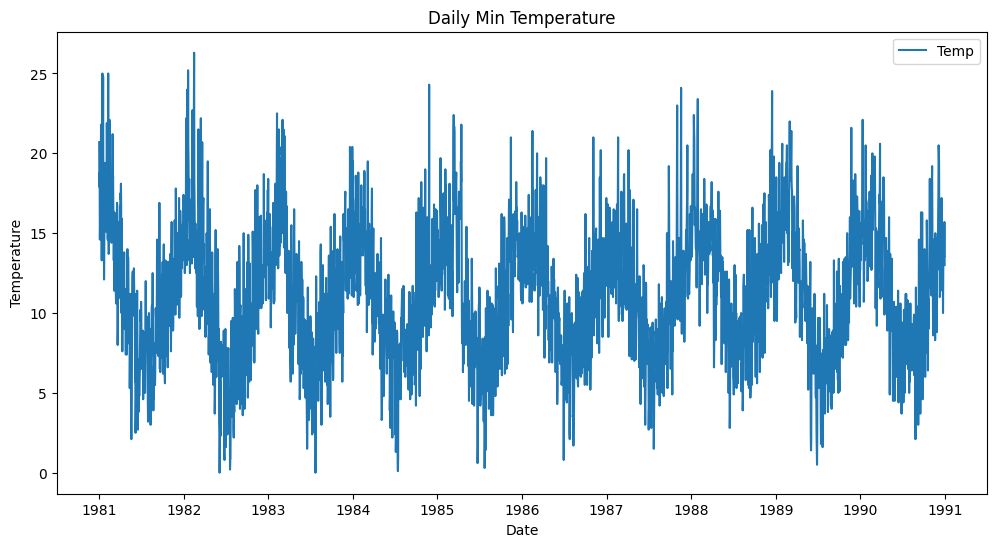

In [4]:
plt.figure(figsize = (12,6))
plt.title("Daily Min Temperature")
plt.xlabel('Date')
plt.ylabel('Temperature')
sns.lineplot(df)

In [5]:
series = df

differenced_series = series.diff(periods = 365)

<Axes: title={'center': 'Differenced Daily Min Temperature'}, xlabel='Date', ylabel='Temperature'>

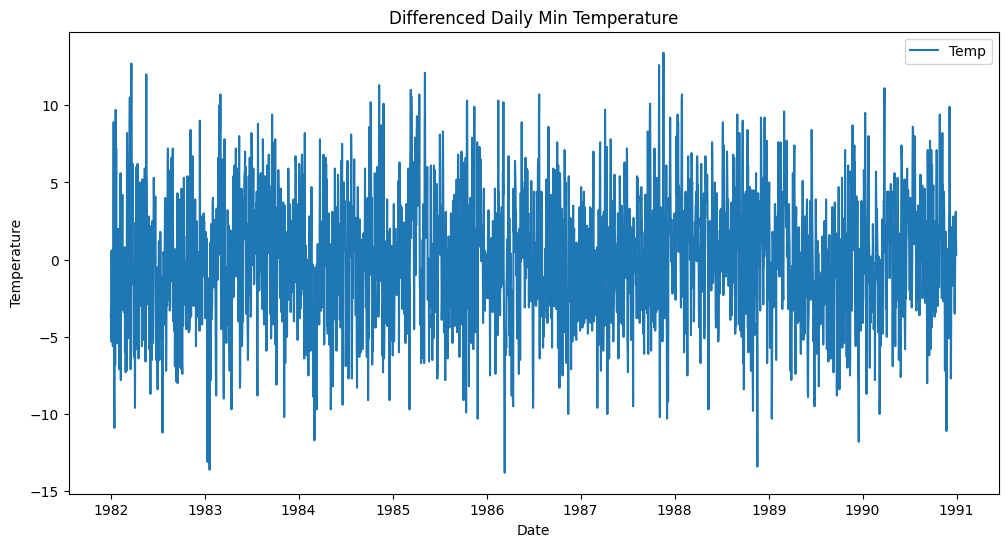

In [6]:
plt.figure(figsize = (12,6))
plt.title("Differenced Daily Min Temperature")
plt.xlabel('Date')
plt.ylabel('Temperature')
sns.lineplot(differenced_series)

In [7]:
X = series.values
manual_differenced_series = list()
days_in_year = 365

for i in range(days_in_year,len(X)):
    value = X[i] - X[i - days_in_year]
    manual_differenced_series.append(value)

In [8]:
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


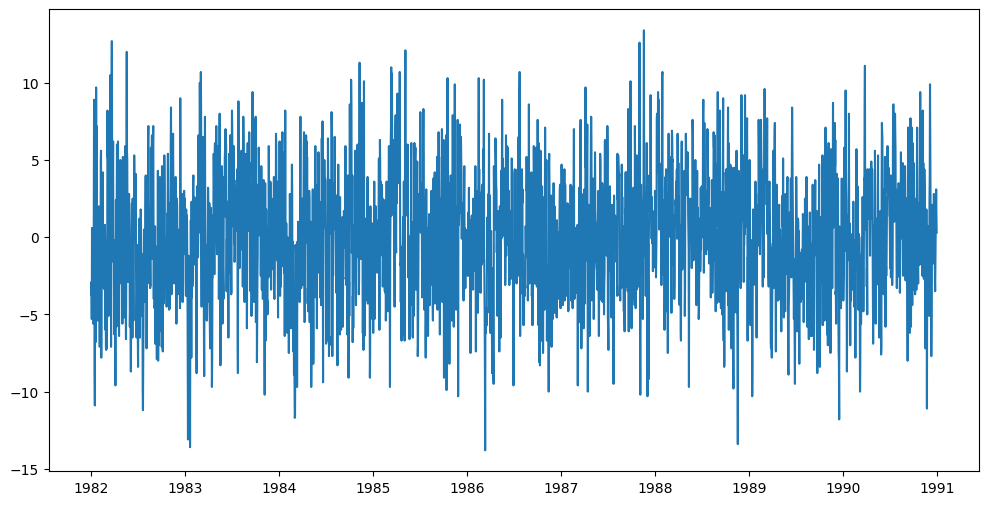

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.index[365:],manual_differenced_series)

In [12]:
import numpy as np

X = np.array([i % 365 for i in range(len(series))])
y = series.values
degree = 4

# Fit polynomial
coef = np.polyfit(X, y, degree)
print('Coefficients:', coef)

# Evaluate polynomial curve
curve = np.polyval(coef, X)

# Calculate difference
diff = y - curve


Coefficients: [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


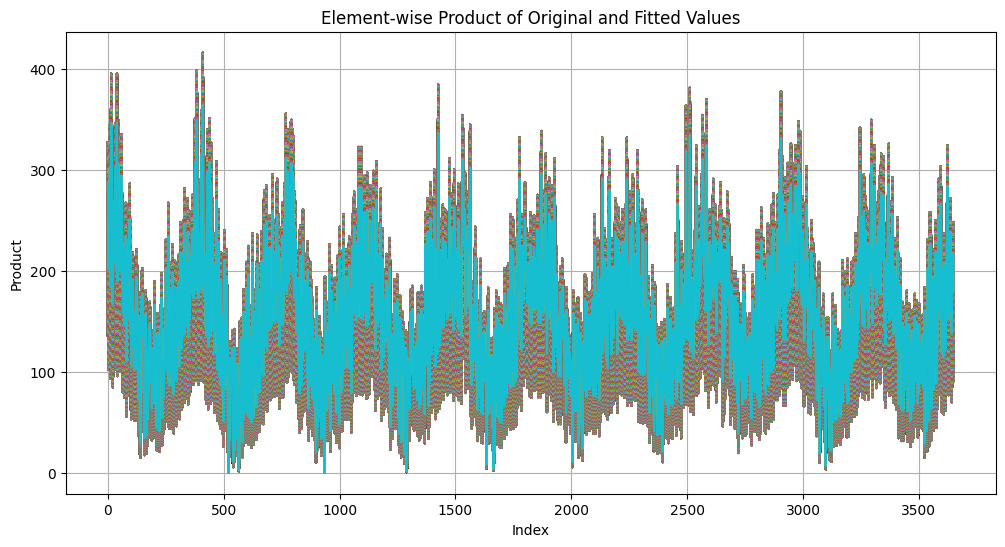

In [14]:
diff = y * curve

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(diff)
plt.title("Element-wise Product of Original and Fitted Values")
plt.xlabel("Index")
plt.ylabel("Product")
plt.grid(True)
plt.show()
